<a href="https://colab.research.google.com/github/Diksha-Bora/Machine_Learning/blob/main/LogisticRegression6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# IMPORTING THE DATASET  
from sklearn.datasets import load_digits
digits = load_digits()

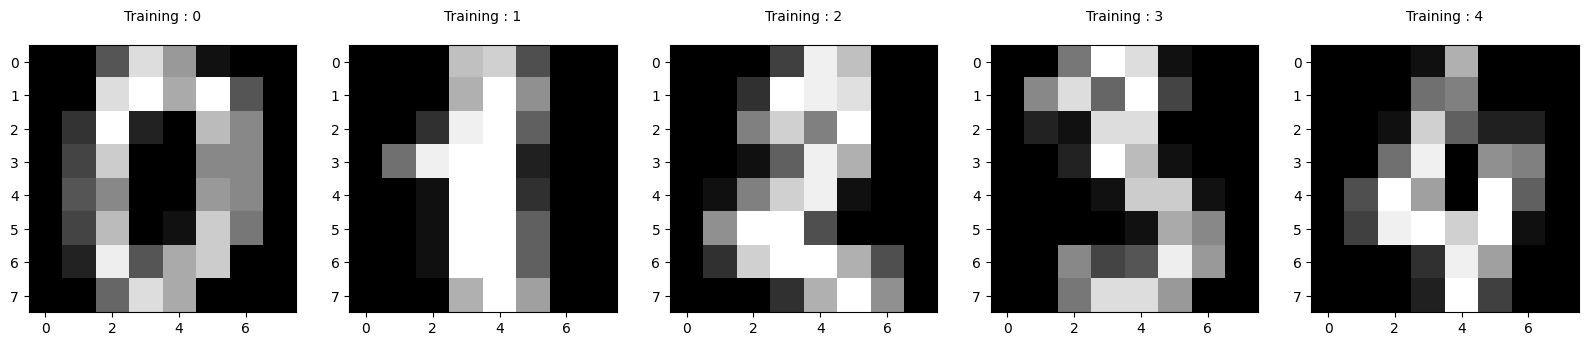

In [25]:
# REPRESENTING IMAGES AND LABELS
plt.figure(figsize=[20,4])
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
  plt.title('Training : %i\n'%label,fontsize = 10)

In [26]:
# CONVERTING DATASETS TO DATAFRAME 
digitsdf = pd.DataFrame(digits.data) 
digitsdf['Target'] = digits.target
digitsdf.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [27]:
digitsdf['Target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

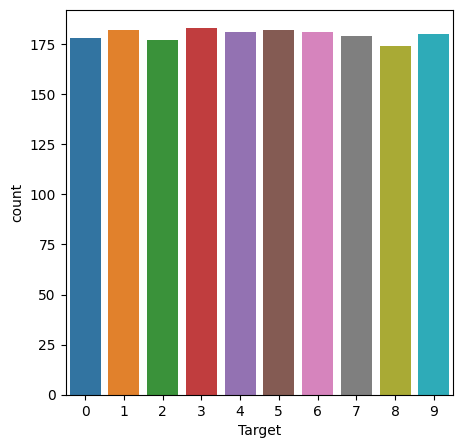

In [28]:
import seaborn as sns
plt.figure(figsize=[5,5])
sns.countplot(data = digitsdf,x = "Target")

[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


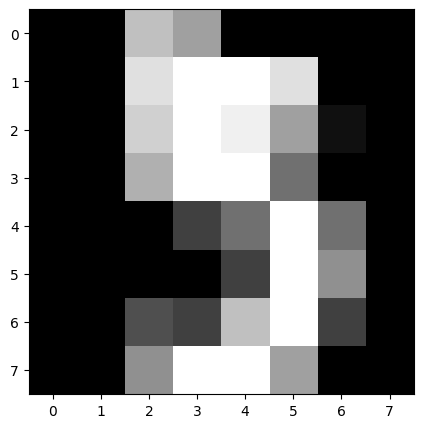

In [29]:
# data flattening to print image
img = np.array(digitsdf.iloc[5,:-1]).reshape((8,8))
print(img)
plt.figure(figsize=[5,5])
plt.imshow(img,cmap = 'gray')

In [30]:
input = digitsdf.drop('Target',axis = 1)
output = digitsdf["Target"]

In [31]:
# SPLITTING DATA INTO TEST & TRAIN
from sklearn.model_selection import train_test_split
input_train , input_test, output_train, output_test = train_test_split(input,output,train_size=0.3,random_state = 5)

In [32]:
# SCALING DATA FOR BETTER ANALYSIS
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_input_train = scaler.fit_transform(input_train)
scaled_input_test = scaler.transform(input_test)

In [33]:
# MODEL SELECTION 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(scaled_input_train,output_train)

LogisticRegression()

In [34]:
pred_out_train = log_reg.predict(scaled_input_train)

In [35]:
print("The intercepts are: ",log_reg.intercept_)

The intercepts are:  [-0.29729747 -0.58088174 -0.39201875 -0.33925865 -0.16487841  0.67117079
 -0.61698012  0.29474033  1.17465655  0.25074746]


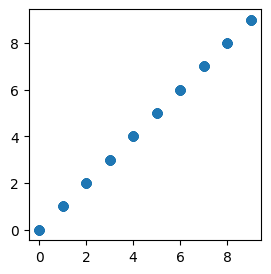

In [36]:
plt.figure(figsize = [3,3])
plt.scatter(output_train,pred_out_train)

In [37]:
# TRAIN MODEL EVALUATION 
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
print("The accuracy score of the model is : ",accuracy_score(output_train,pred_out_train))
print("The classification_report of the model is : ",classification_report(output_train,pred_out_train))
print("The f1_score of the model is : ",f1_score(output_train,pred_out_train,average = 'weighted'))

The accuracy score of the model is :  1.0
The classification_report of the model is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        59
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        59
           8       1.00      1.00      1.00        39
           9       1.00      1.00      1.00        63

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539

The f1_score of the model is :  1.0


Text(8.222222222222223, 0.5, 'Predicted_output_train')

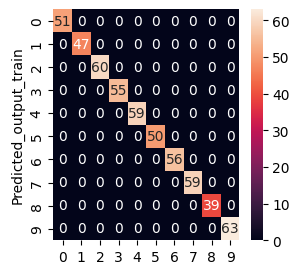

In [38]:
# CONFUSION MATRIX FOR TRAIN MODEL
cm = confusion_matrix(output_train,pred_out_train)
plt.figure(figsize=[3,3])
sns.heatmap(cm , annot = True)
plt.ylabel("Predicted_output_train")

In [39]:
log_reg.fit(scaled_input_test,output_test)
pred_out_test = log_reg.predict(scaled_input_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


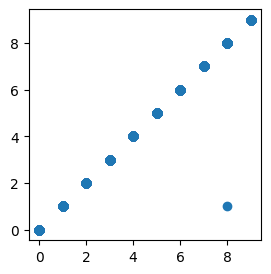

In [40]:
plt.figure(figsize=[3,3])
plt.scatter(output_test,pred_out_test)

In [41]:
# TEST MODEL EVALUATION 
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
print("The accuracy score of the model is : ",accuracy_score(output_test,pred_out_test))
print("The classification_report of the model is : ",classification_report(output_test,pred_out_test))
print("The f1_score of the model is : ",f1_score(output_test,pred_out_test,average = 'weighted'))
print("The confusion_matrix of the model is \n : ",confusion_matrix(output_test,pred_out_test))

The accuracy score of the model is :  0.9992050874403816
The classification_report of the model is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       0.99      1.00      1.00       135
           2       1.00      1.00      1.00       117
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00       132
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00       120
           8       1.00      0.99      1.00       135
           9       1.00      1.00      1.00       117

    accuracy                           1.00      1258
   macro avg       1.00      1.00      1.00      1258
weighted avg       1.00      1.00      1.00      1258

The f1_score of the model is :  0.9992050765360818
The confusion_matrix of the model is 
 :  [[127   0   0   0   0   0   0   0   0   0]
 [ 

Text(95.72222222222221, 0.5, 'Predicted_output_test')

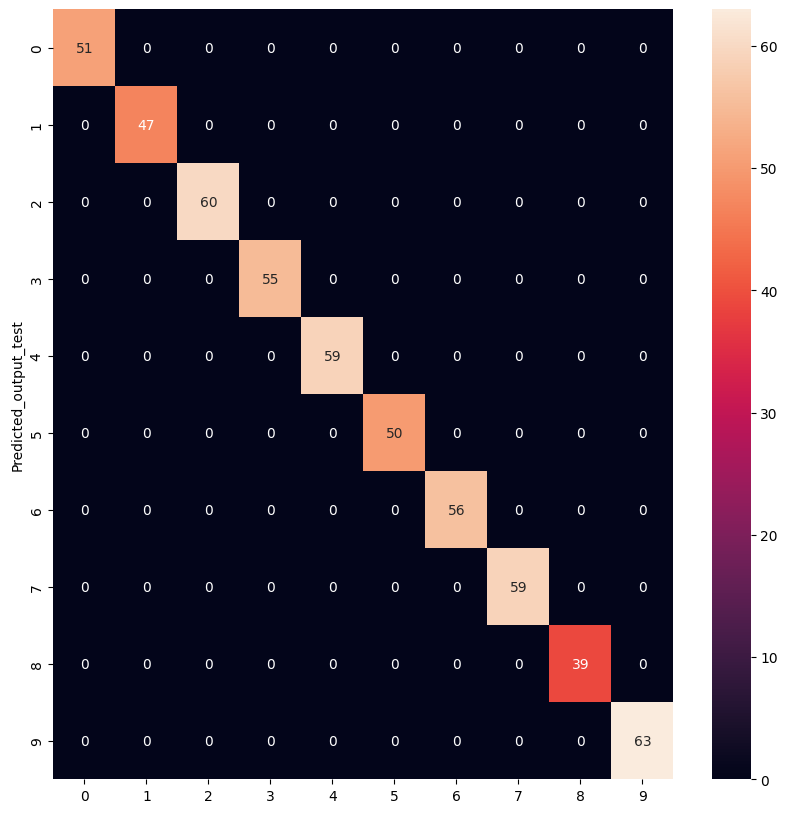

In [42]:
# CONFUSION MATRIX FOR TEST MODEL
plt.figure(figsize=[10,10])
sns.heatmap(cm , annot = True)
plt.ylabel("Predicted_output_test")

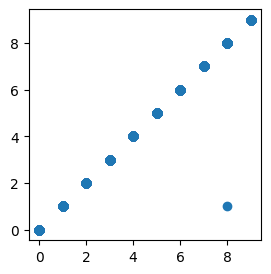

In [43]:
plt.figure(figsize = [3,3])
plt.scatter(output_test,pred_out_test)